#Project: TITANIC SURVIVAL PREDICTION

#Instructions:

*   Use the Titanic dataset to build a model that predicts whether a passenger on the Titanic survived or not. This is a classic beginner project with readily available data.
*   The dataset typically used for this project contains information about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

#Importing Important Libraries and Reading Dataset and Analyze

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#Getting the Shape
print('Dataset Shape:', df.shape)

Dataset Shape: (891, 12)


In [3]:
#Getting the Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Getting the Null values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
#Getting Duplicate values
df.duplicated().sum()

0

In [6]:
#Getting the EDA
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Making a copy of the original data to prevent any inconvenience

In [7]:
df1 = df.copy()

#Initiate Data Cleaning process....

In [8]:
#Check using histogram if the distribution is normal i will with 'Mean' and if it is rightly skwed i will go with 'Median'
import plotly.express as px
fig = px.histogram(data_frame=df1, x="Age")
fig.show()

* The distribution of the Age column shows a somewhat right-skewed pattern with a few outliers (e.g., very young and old individuals). This suggests that the median might be a better choice for handling missing age values, as the mean could be affected by the extreme values.

In [9]:
#Handling null values using imputation
df1['Age'] = df1['Age'].fillna(df1['Age'].median())
df1['Embarked'] = df1['Embarked'].fillna(df1['Embarked'].mode()[0])

In [10]:
#dropping the cabin column as it will not any impact
df1.drop(columns=['Cabin','PassengerId','Name','Ticket'], inplace=True)


In [12]:
df1.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


#"Unveiling Insights: A Dive into Univariate Analysis"

In [13]:
#after handling the null values
import plotly.express as px
fig = px.histogram(data_frame=df1, x="Age")
fig.show()

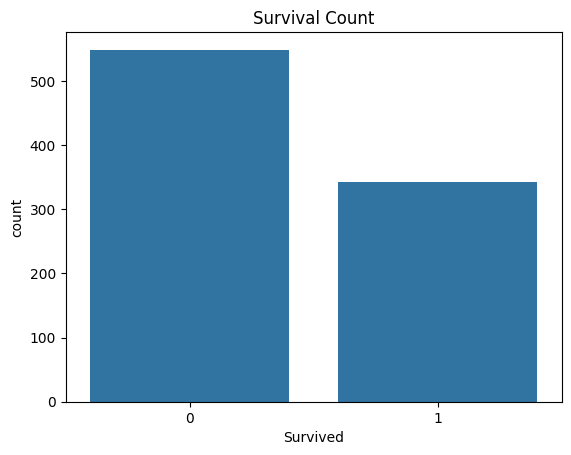

In [14]:
sns.countplot(data=df1, x='Survived')
plt.title('Survival Count')
plt.show()

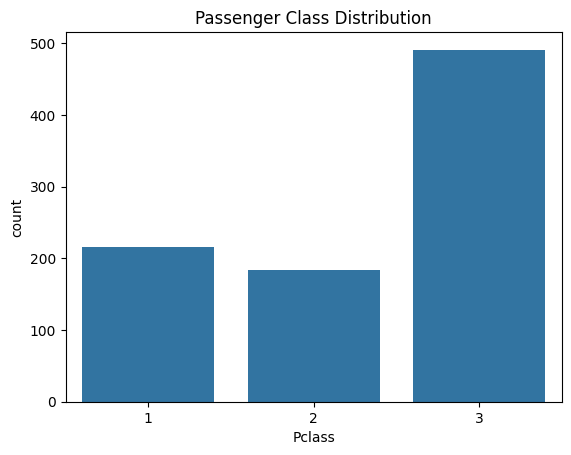

In [15]:
sns.countplot(data=df1, x='Pclass')
plt.title('Passenger Class Distribution')
plt.show()

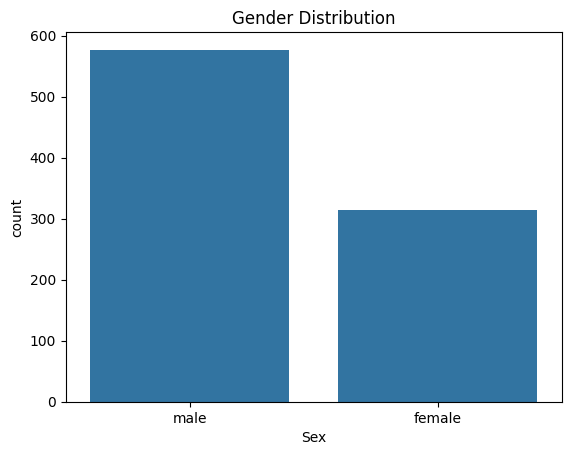

In [16]:
sns.countplot(data=df1, x='Sex')
plt.title('Gender Distribution')
plt.show()

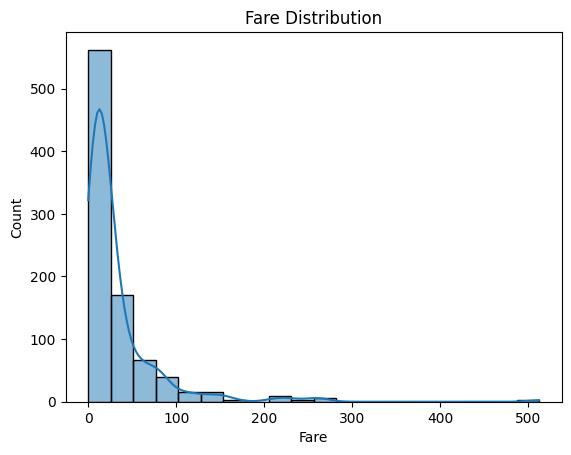

In [17]:
sns.histplot(df1['Fare'], bins=20, kde=True)
plt.title('Fare Distribution')
plt.show()

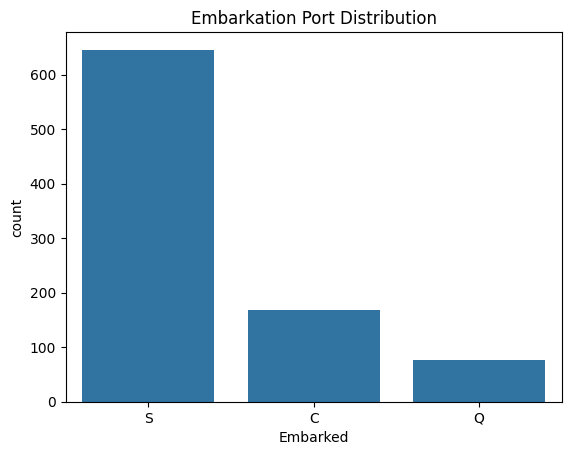

In [18]:
sns.countplot(data=df1, x='Embarked')
plt.title('Embarkation Port Distribution')
plt.show()

#Insights for Univariate Anaysis

* Gender Distribution:
There are more male passengers than female passengers, which could be a significant factor in survival analysis.
* Age Distribution:
The age distribution shows a concentration of passengers between 20 and 40 years old, with a gradual decline as age increases. The distribution is right-skewed with a few outliers in older age groups.

#Encoding the categorical columns

In [19]:
df1['Sex'] = df1['Sex'].map({'male': 0, 'female': 1})
df1 = pd.get_dummies(df1, columns=['Embarked'], drop_first=True)

In [20]:
#Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1[['Age', 'Fare']] = scaler.fit_transform(df1[['Age', 'Fare']])

#"Unveiling Insights: A Dive into Multivariate/Bivariate Analysis"

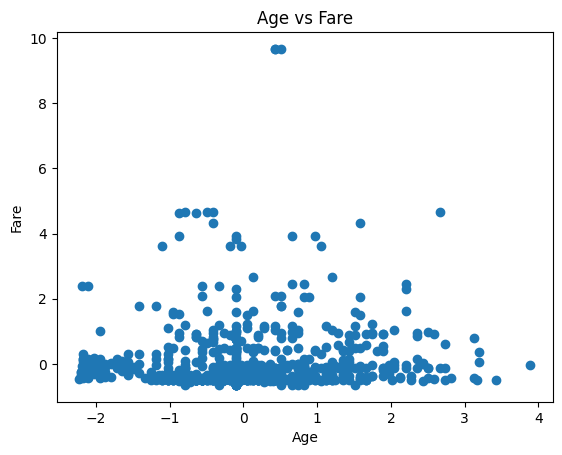

In [21]:
plt.scatter(df1['Age'], df1['Fare'])
plt.title('Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

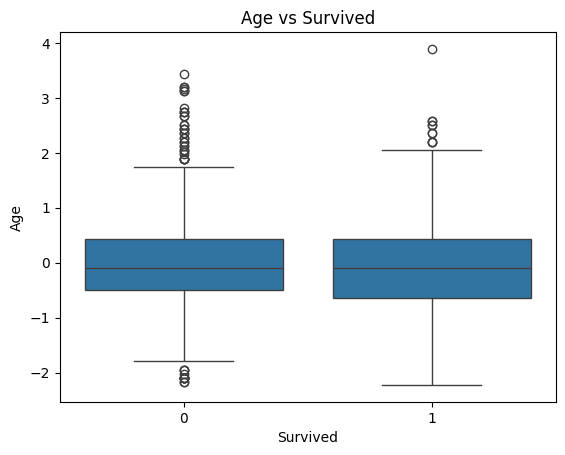

In [22]:
sns.boxplot(x='Survived', y='Age', data=df1)
plt.title('Age vs Survived')
plt.show()

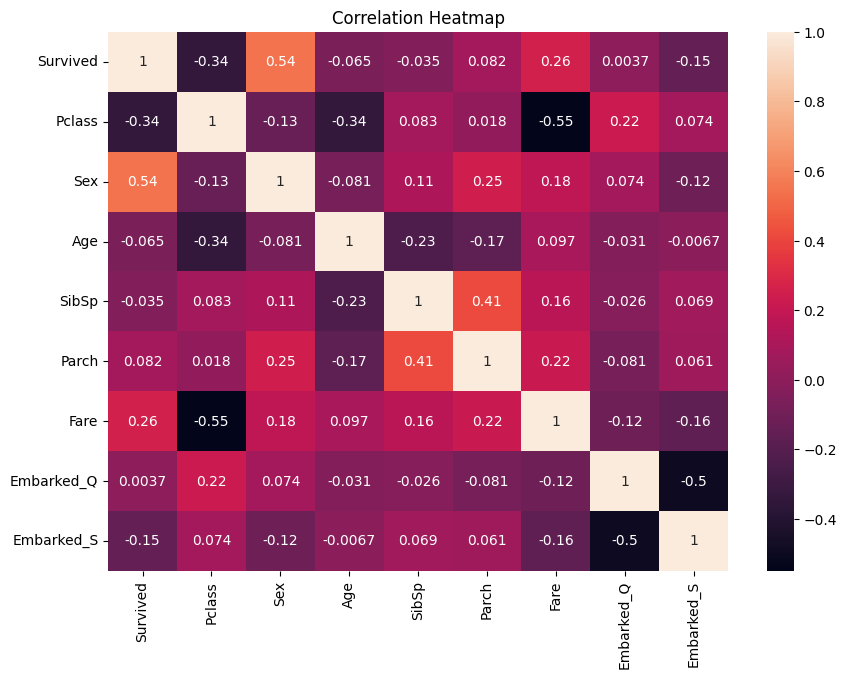

In [23]:
corr = df1.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)
plt.title('Correlation Heatmap')
plt.show()

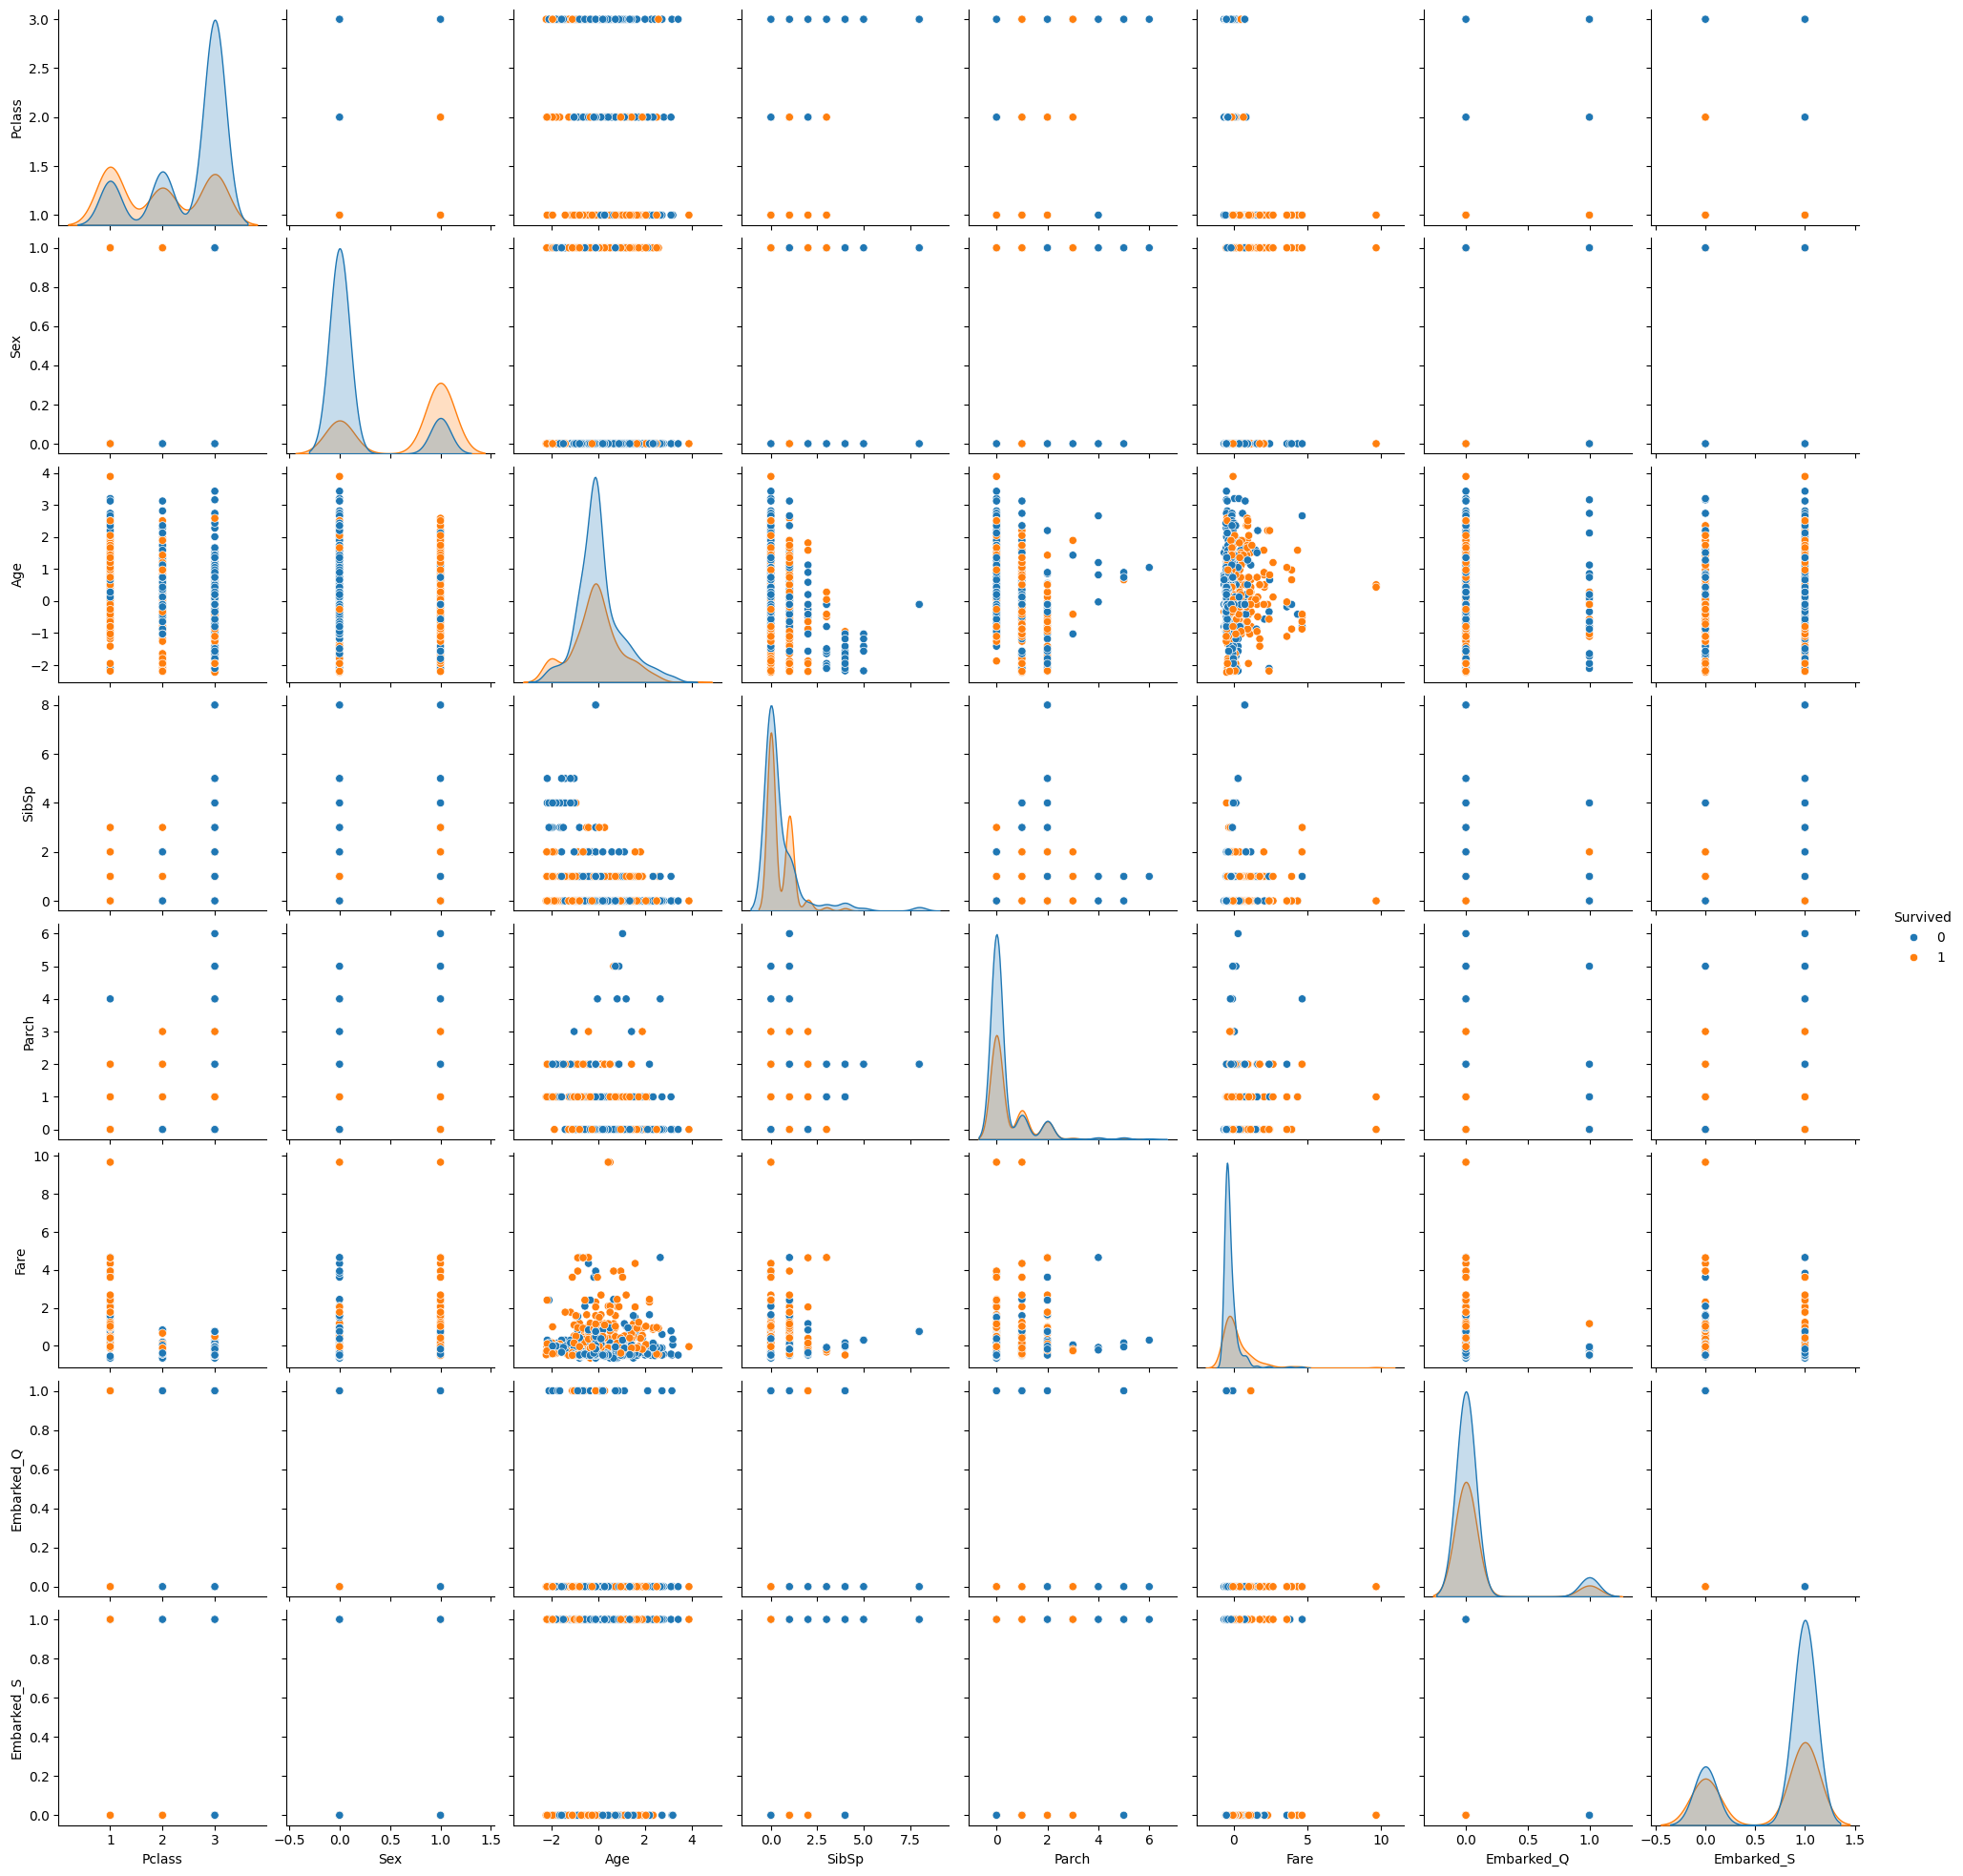

In [24]:
#Pairplot
sns.pairplot(df1, hue='Survived', diag_kind='kde')
plt.show()

#Splitting the data into x and y

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X = df1.drop('Survived', axis=1)
y = df1['Survived']

#Model Building

In [28]:
#Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Model training using LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

#Model evaluation & Predictions
y_pred = model.predict(X_test_scaled)

#Check accuracy & classification report
accuracy = accuracy_score(y_test, y_pred)
#Getting the output
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 81.01%
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



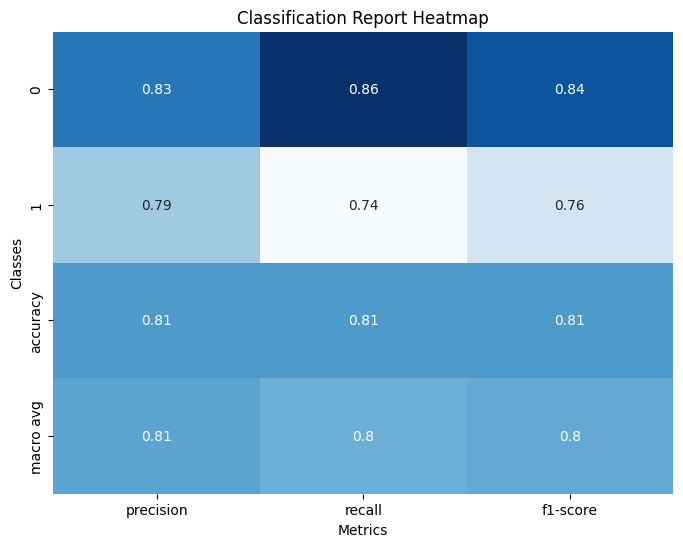

In [29]:
#Visualization of Classification report for better understand
report = classification_report(y_test, y_pred, output_dict=True)

#Converting the report to a DataFrame
df_classification_report = pd.DataFrame(report).transpose()

#Plotting the Heatmap for precision, recall, and f1-score
plt.figure(figsize=(8, 6))
sns.heatmap(df_classification_report.iloc[:-1, :3], annot=True, cmap="Blues", cbar=False)

#Adding the Title
plt.title('Classification Report Heatmap')
#Adding the Labels
plt.ylabel('Classes')
plt.xlabel('Metrics')
plt.show()

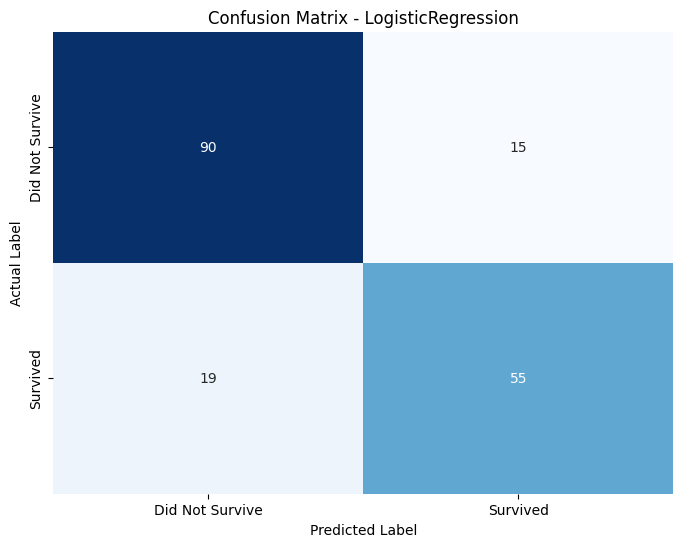

In [30]:
#Confusion matrics with heatmap visuals
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

#Plotting the heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Did Not Survive", "Survived"],
            yticklabels=["Did Not Survive", "Survived"])

#Adding the title
plt.title('Confusion Matrix - LogisticRegression')
#Adding the labels
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()#showing the output

By. Girish Kumar (Intership_Trainee@CodSoft)